# Sondeo eléctrico vertical

In [1]:
import pygimli as pg 
from pygimli.physics import VESManager
import numpy as np

# Modelo directo
**Un modelo directo consiste en la generación de datos sintéticos intentando recrear escenarios del subsuelo.**

In [2]:
ab2 = np.logspace(-0.5, 2.5, 40) # Distancia AB/2 (electrodos de corriente)

Definir un modelo sintético y simular los datos, incluir ruido

In [3]:
synres = [100., 500., 20., 1000.] # Resistividades de las capas
synthk = [0.5, 3.5, 6.] # Espesores de las capas

Operador hacia adelante

In [4]:
synthModel = synthk + synres # Modelo sintético, concatena ambas listas

In [5]:
ves = VESManager()

In [6]:
rhoa, err = ves.simulate(synthModel, ab2=ab2, mn2=ab2/3, noiseLevel = 0.03, seed=1337)

In [7]:
rhoa

40 [101.38979696368206, 104.19639857251963, 108.02791101022758, 108.00150512901476, 121.74946623744194, 122.62400707040342, 140.3920268589198, 159.47371559631398, 183.6978331294101, 187.23259414009678, 225.57133563252208, 235.83734495235413, 254.3702082982854, 287.52391943014305, 307.91797732069523, 287.4831452315287, 298.8098983538898, 303.5635468425441, 289.57230719728716, 245.3290896293929, 211.81827138709787, 183.35711875301217, 142.120387321365, 117.85230925324436, 104.21234037112197, 92.8797157740323, 95.0138351903641, 95.75868783488784, 118.44305444838852, 139.16518020005827, 169.10809659162922, 182.57468387595685, 226.03973441557795, 242.842352279225, 290.69835609018486, 326.43756452000343, 373.7706157529075, 429.78935831848133, 464.30599421722127, 521.98923349989]

In [8]:
err

array([0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
       0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03])

## Inversión de los datos sintéticos

In [9]:
ves.invert(data=rhoa, error=err, ab2=ab2, mn2=ab2/3, nLayers=4, lam=1000, lambdaFactor=0.8)

06/02/24 - 19:53:11 - pyGIMLi - WARNING - No data error given, set Fallback set to 1%
06/02/24 - 19:53:11 - pyGIMLi - INFO - Created startmodel from forward operator: 7, min/max=0.052705/185.465214
06/02/24 - 19:53:11 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 19:53:11 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 19:53:12 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 19:53:12 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 19:53:12 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 19:53:12 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 19:53:12 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 19:53:12 - pyGIMLi - WARNING - Multiprocess Jacobian cur

7 [0.4799720909345865, 3.382889905217545, 8.560494972310366, 96.60193136484894, 502.8043524399367, 27.99028787348529, 1067.3267427318524]

Mostrar modelo estimado y modelo sintético

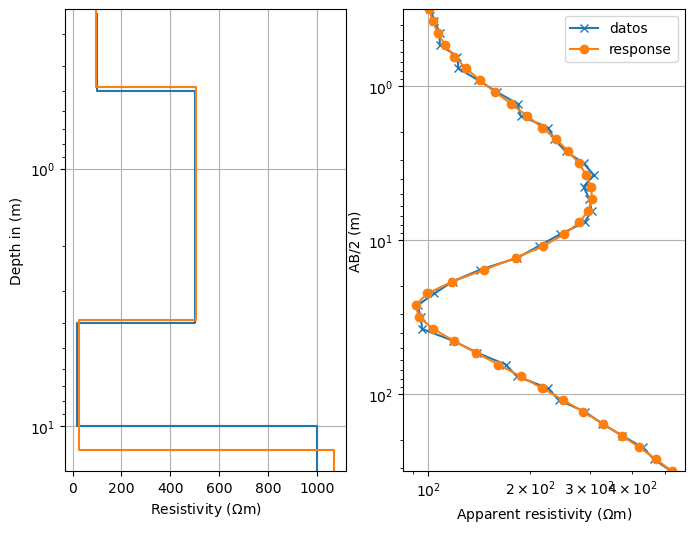

In [16]:
fig, ax = pg.plt.subplots(ncols=2, figsize=(8, 6)) #Figura de dos columnas
ves.showModel(synthModel, ax=ax[0], label="Modelo Sintético", plot='semilogy', zmax=15) #Muestra el modelo sintético
ves.showModel(ves.model, ax=ax[0], label="Modelo Invertido", plot='semilogy', zmax=15) #Muestra el modelo invertido
ves.showData(rhoa, ax=ax[1], label="datos", color='C0', marker='x') #Muestra los datos
out = ves.showData(ves.inv.response, ax=ax[1], label="response", color='C1', marker='o') #Muestra los datos invertidos

# Modelado inverso de datos reales

In [17]:
import pygimli as pg 
from pygimli.physics import VESManager
import numpy as np

In [19]:
txt = np.loadtxt('datos_sev/sev_2.sdg.TXT', delimiter='\t', skiprows=1) #Carga los datos de un archivo .txt

In [37]:
ab2 = (txt[:, 0]) # Distancia AB/2 (electrodos de corriente)

In [36]:
ab2

[array([  2.,   3.,   4.,   5.,   6.,   8.,  10.,  13.,  16.,  20.,  25.,
         32.,  40.,  50.,  65.,  80., 100., 125., 160., 200.])]

In [33]:
mn2 = [mn/2 for mn in txt[:, 1]] # Distancia MN/2 (electrodos de potencial)

In [34]:
mn2

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.0]

In [23]:
rhoa=(txt[:, 6]) # Resistividad aparente

In [38]:
rhoa

array([ 82.467, 137.44 ,  31.049,  34.678,  36.445,  36.25 ,  29.927,
        25.049,  17.877,  11.931,  11.776,  11.926,  13.854,  14.968,
        11.215,  13.018,  19.586,  20.829,  24.104,  31.396])

In [22]:
ves=VESManager()

In [47]:
ves.invert(data=rhoa, error=0.1, ab2=ab2, mn2=mn2, nLayers=4, lam=1000, lambdaFactor=0.8, verbose=True)

06/02/24 - 20:29:59 - pyGIMLi - INFO - Created startmodel from region infos: 7 [0.25, 2.9122776601683786, 36.837722339831615, 22.4665, 22.4665, 22.4665, 22.4665]
06/02/24 - 20:29:59 - pyGIMLi - INFO - Starting inversion.
06/02/24 - 20:29:59 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 20:29:59 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 20:29:59 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 20:29:59 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.


fop: <pygimli.physics.ves.vesModelling.VESModelling object at 0x000001E3FDB85770>
Data transformation: <pgcore._pygimli_.RTransLog object at 0x000001E38808A540>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x000001E3881A3D60>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000001E3881A3D60>
min/max (data): 11.22/137
min/max (error): 1%/1%
min/max (start model): 0.25/36.84
--------------------------------------------------------------------------------
inv.iter 0 ... chi² = 4206.55
--------------------------------------------------------------------------------
inv.iter 1 ... chi² =  874.15 (dPhi = 79.22%) lam: 1000.0
--------------------------------------------------------------------------------
inv.iter 2 ... chi² =  817.51 (dPhi = 6.48%) lam: 800.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² =  768.46 (dPhi = 6.00%) lam: 640.0
---------------------------------------------------------------------

06/02/24 - 20:29:59 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 20:29:59 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 20:29:59 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 20:29:59 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.


chi² =  757.36 (dPhi = 1.44%) lam: 512.0
--------------------------------------------------------------------------------
inv.iter 5 ... chi² =  747.00 (dPhi = 1.37%) lam: 409.6
--------------------------------------------------------------------------------
inv.iter 6 ... chi² =  707.95 (dPhi = 5.23%) lam: 327.7
--------------------------------------------------------------------------------
inv.iter 7 ... chi² =  632.97 (dPhi = 10.59%) lam: 262.1
--------------------------------------------------------------------------------
inv.iter 8 ... 

06/02/24 - 20:30:00 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 20:30:00 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 20:30:00 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 20:30:00 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
06/02/24 - 20:30:00 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.


chi² =  612.77 (dPhi = 3.19%) lam: 209.7
--------------------------------------------------------------------------------
inv.iter 9 ... chi² =  601.85 (dPhi = 1.78%) lam: 167.8
--------------------------------------------------------------------------------
inv.iter 10 ... chi² =  569.94 (dPhi = 5.30%) lam: 134.2
--------------------------------------------------------------------------------
inv.iter 11 ... chi² =  542.51 (dPhi = 4.81%) lam: 107.4
--------------------------------------------------------------------------------
inv.iter 12 ... chi² =  535.42 (dPhi = 1.31%) lam: 85.9
--------------------------------------------------------------------------------
inv.iter 13 ... 

06/02/24 - 20:30:00 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.


chi² =  528.90 (dPhi = 1.22%) lam: 68.7
--------------------------------------------------------------------------------
inv.iter 14 ... chi² =  528.66 (dPhi = 0.05%) lam: 55.0
################################################################################
#                Abort criterion reached: dPhi = 0.05 (< 1.0%)                 #
################################################################################


7 [1.0614203927534078, 5.44563822126801, 53.333982706180755, 158.72664127440515, 34.98189871887735, 10.16850469777416, 152.18419810586067]

(<Axes: xlabel='Apparent resistivity ($\\Omega$m)', ylabel='AB/2 (m)'>, None)

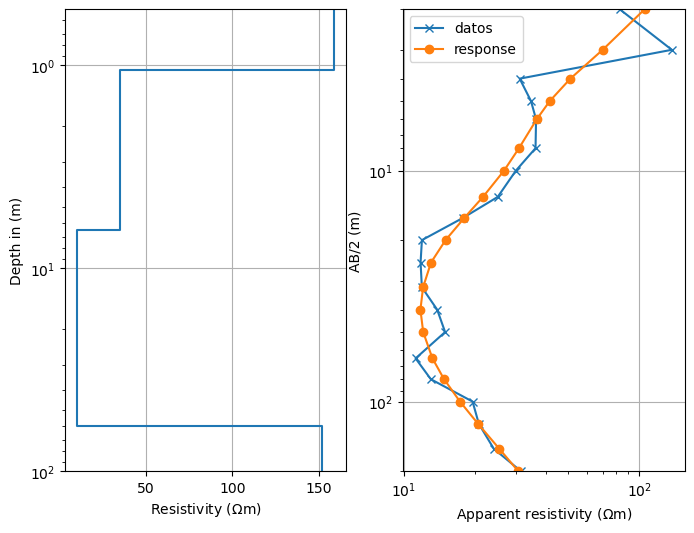

In [46]:
fig, ax = pg.plt.subplots(ncols=2, figsize=(8, 6)) #Figura de dos columnas
ves.showModel(ves.model, ax=ax[0], label="Modelo", plot='semilogy', zmax=100) #Muestra el modelo invertido
ves.showData(rhoa, ax=ax[1], label="datos", color='C0', marker='x') #Muestra los datos
ves.showData(ves.inv.response, ax=ax[1], label="response", color='C1', marker='o') #Muestra los datos invertidos